# 1. Data understanding, preparation and EDA

## Required libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLS

In [2]:
bike_data = pd.read_csv('day.csv')

### Understanding Data

In [3]:
bike_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_data.drop(['casual','registered'],axis=1)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed   cnt  
0             2  14.110847  18.18125  80.5833  10.749882   985  
1             2  14.902598  17.68695  69.6087  16.652113   801  
2             1   8.050924   9.47025  43.7273  16.636703  1349  
3             1   8.200000  10.60610  59.0435  10.739832  1562  
4             1   9.305237  11.46350  43.6957  12.522300  1600  
..          ...        ...       ...      ...        ...   ...  
725           2  10.420847  11.33210  65.2917  23.458911  2114  
726           2  10.386653  12.75230  59.0000  10.416557  3095  
727           2  10.386653  12.12000  75.2917   8.333661  1341  
728           1  10.489153  11.58500  48.3333  23.500518  1796  
729           2   8.849153  11.17435  57.7500  10.374682  2729  

[730 rows x 14 columns]

In [6]:
bike_data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
bike_data.shape

(730, 16)

In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### data visualisation 

<Figure size 2000x1200 with 0 Axes>

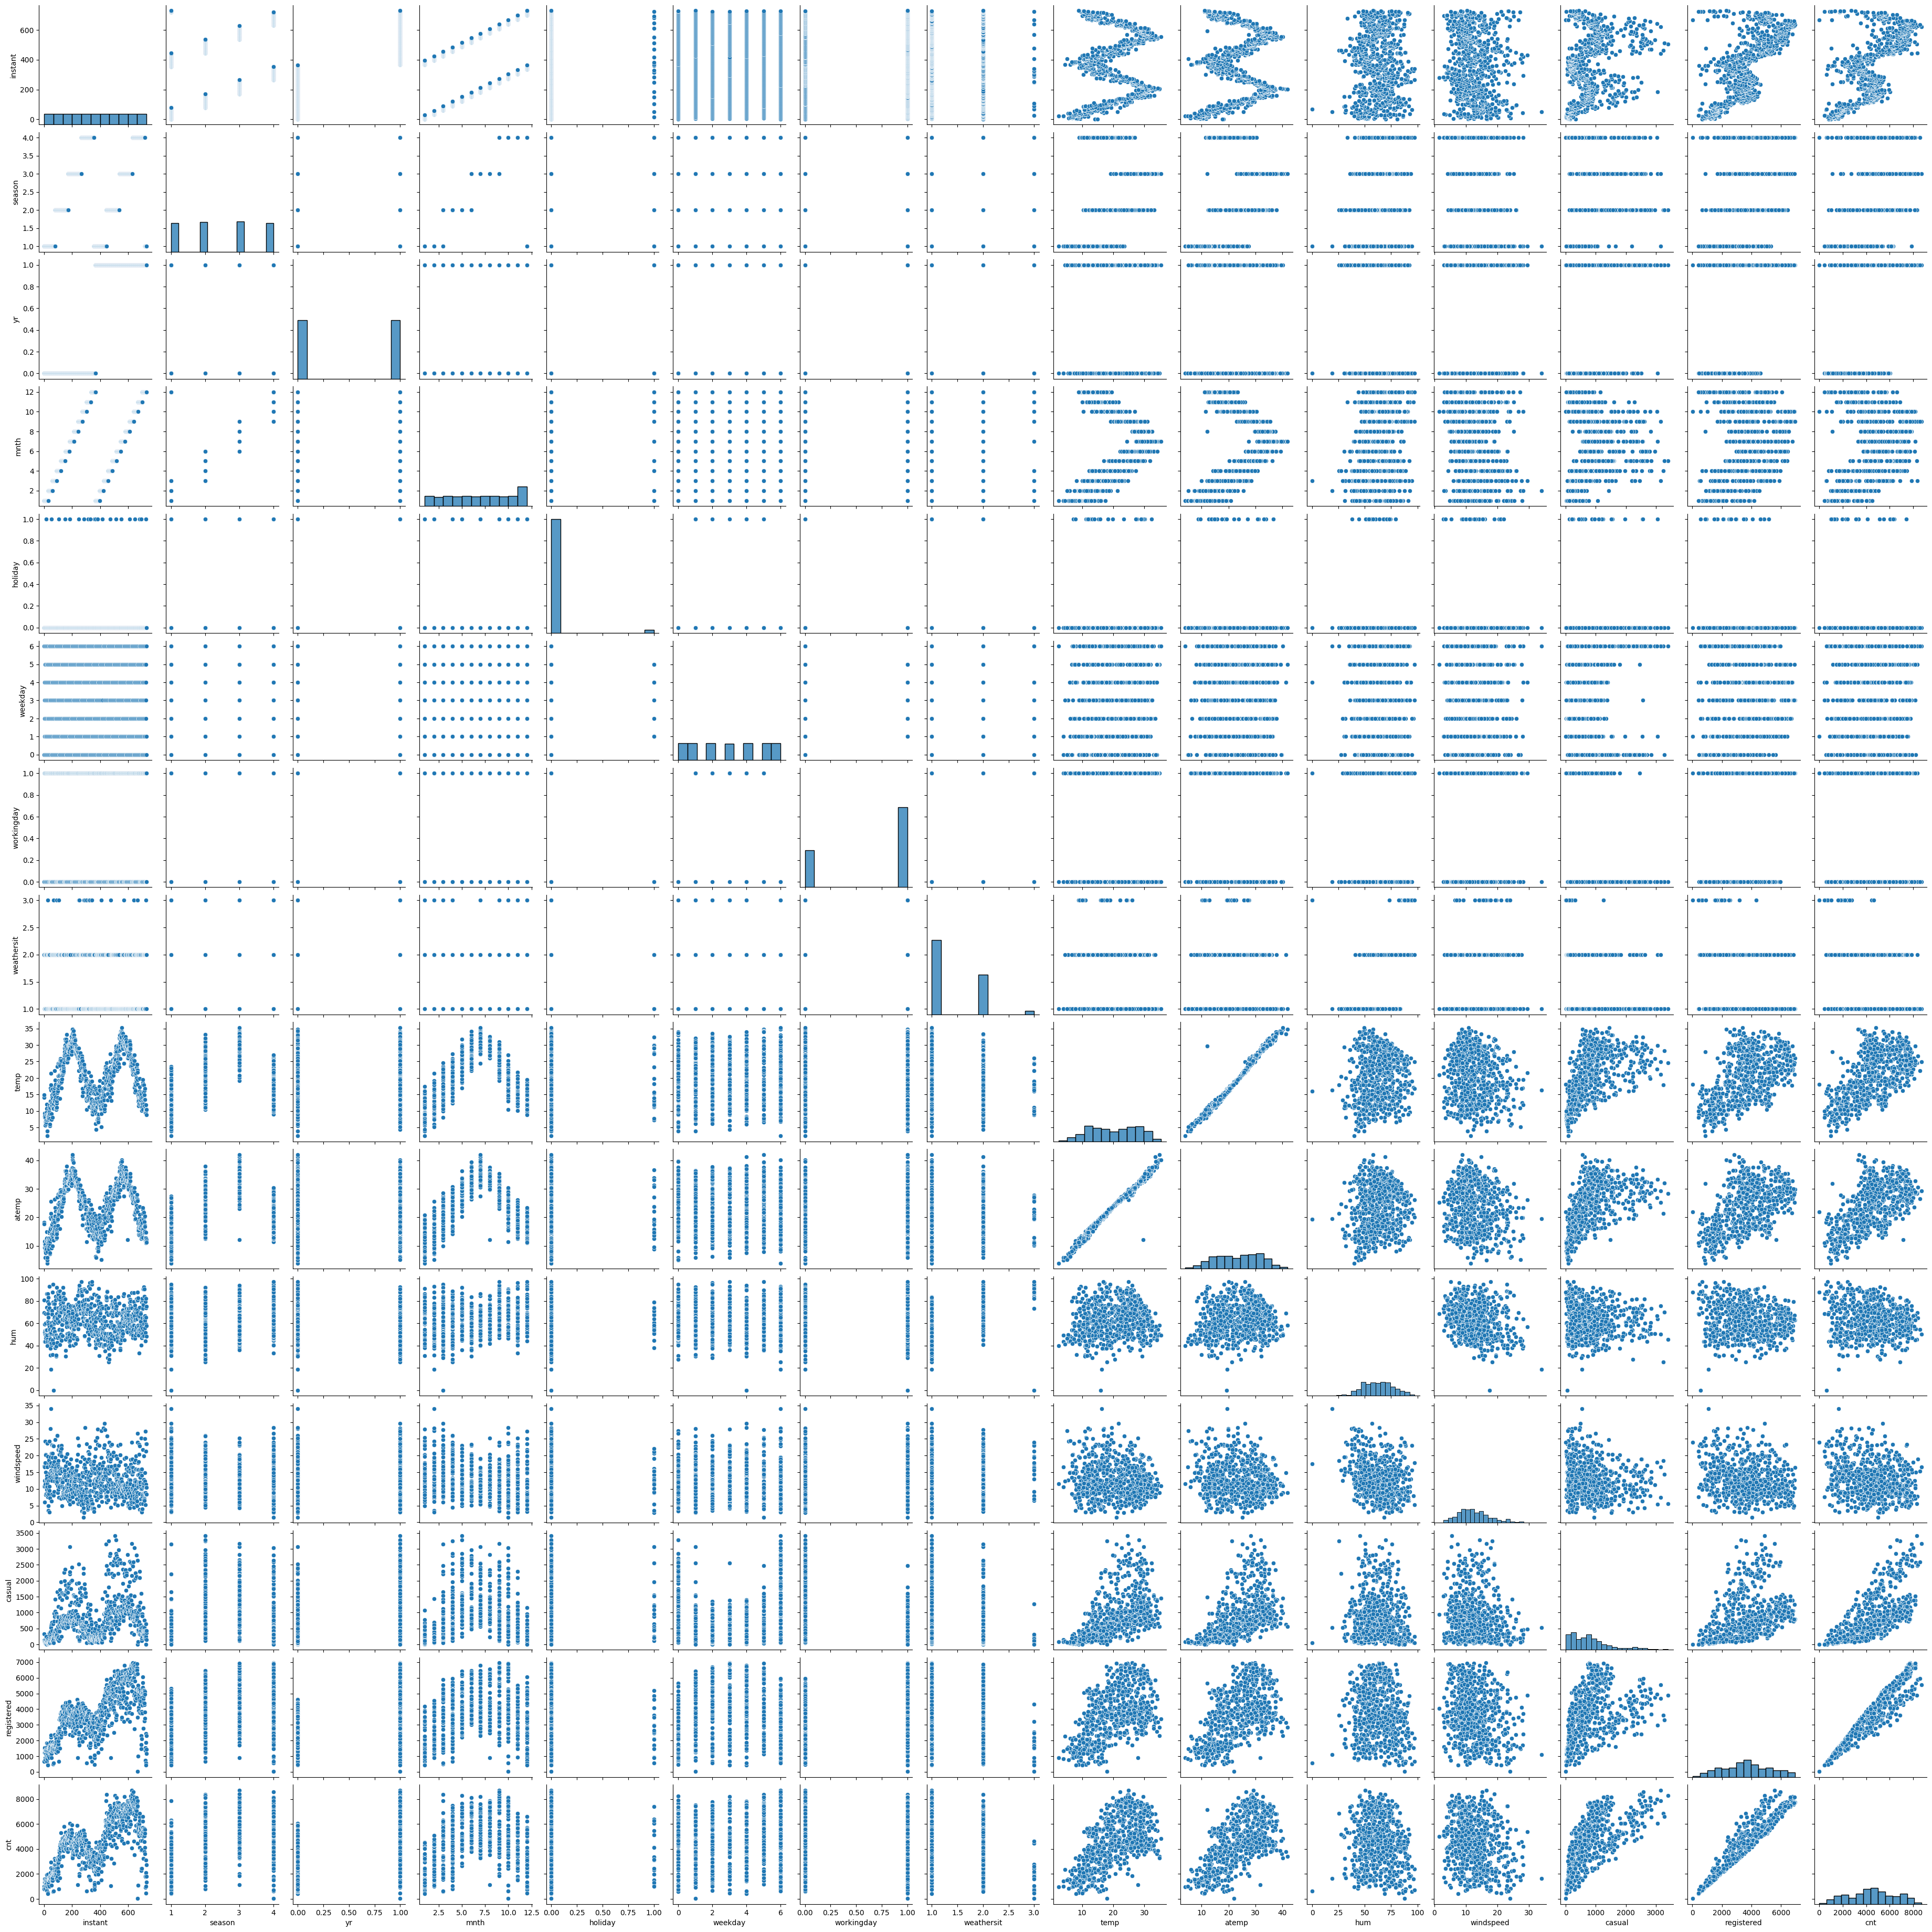

In [10]:
plt.figure(figsize=(20, 12))
sns.pairplot(bike_data)

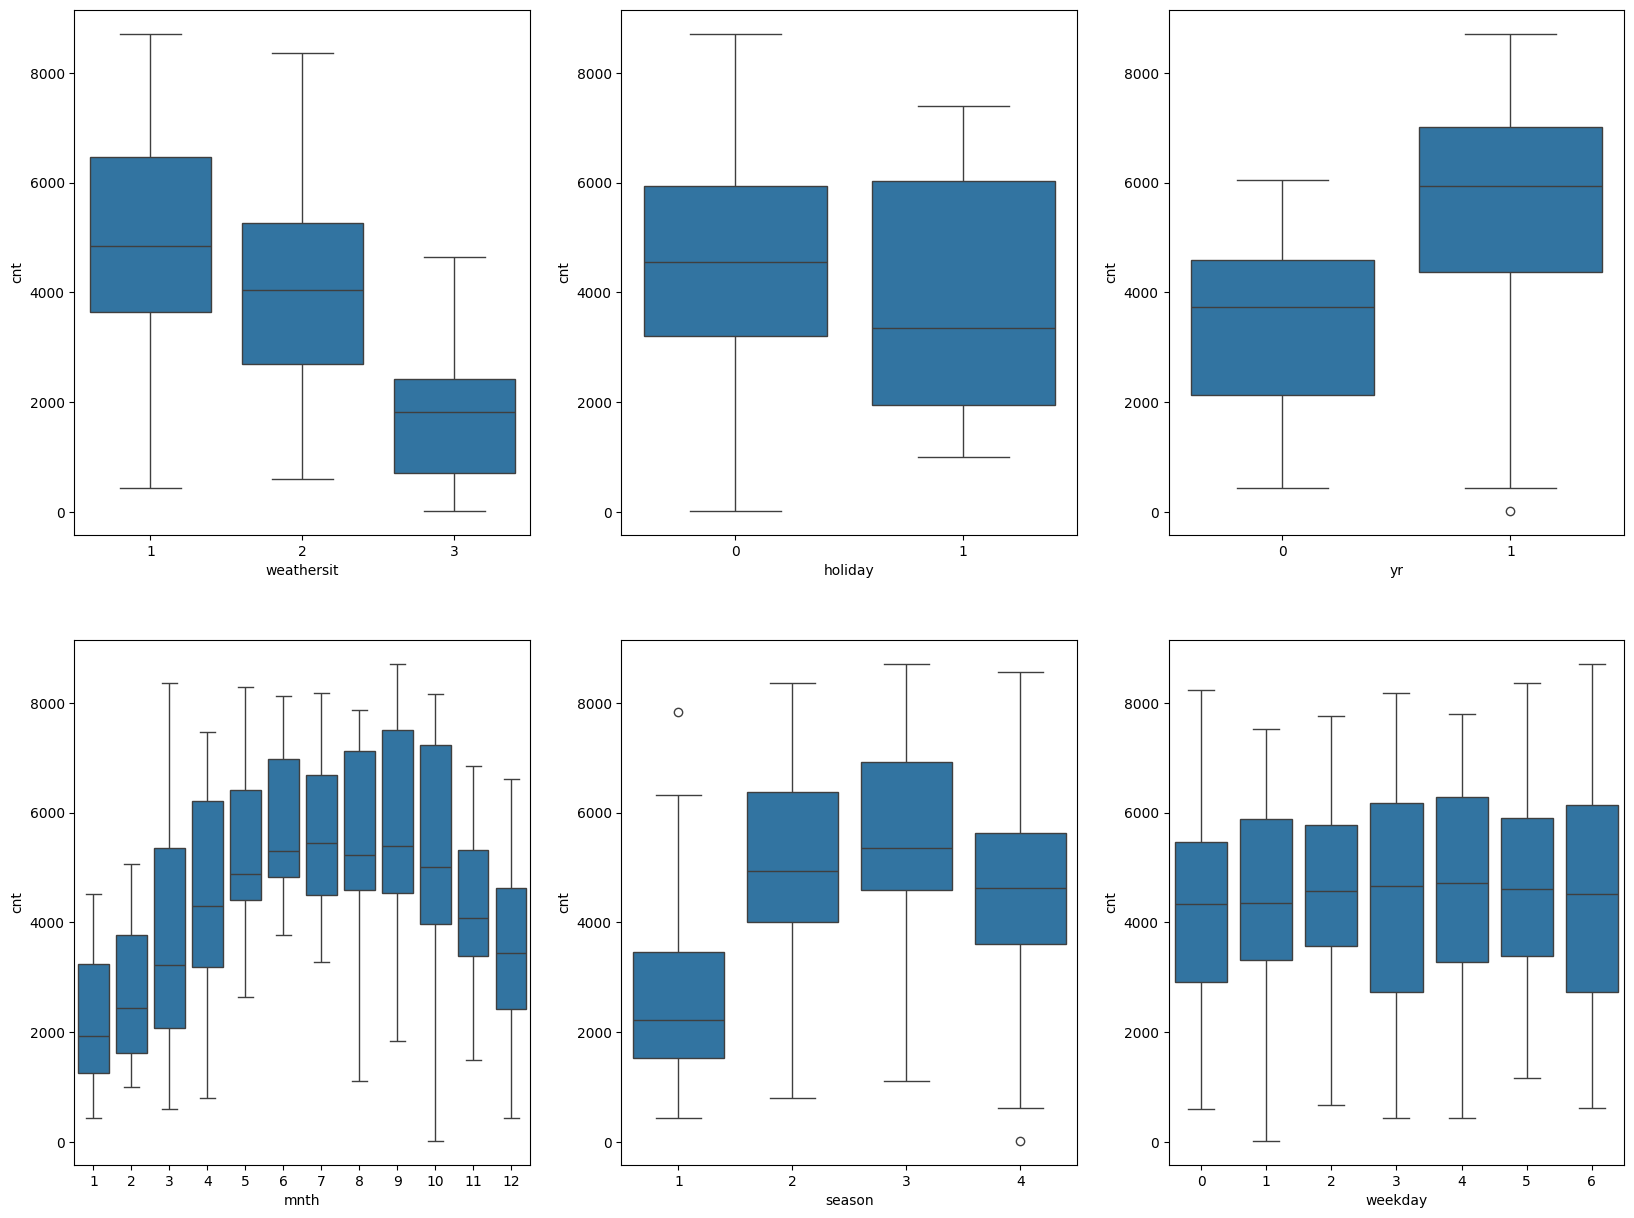

In [11]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
#sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
#plt.subplot(2,3,6)
plt.show()

# Dummy Variable

In [12]:
season_mapping = {1:'Spring',2:'Summer',3:'Autumn',4:'Winter'}
def seasons(x):
    for k,v in season_mapping.items():
        if x==k:
            return v
month_mapping = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
def months(x):
    for k,v in month_mapping.items():
        if x==k:
            return v
days_mapping = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
def weekdays(x):
    for k,v in days_mapping.items():
        if x==k:
            return v

weather_mapping = {1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}
def weather(x):
    for k,v in weather_mapping.items():
        if x==k:
            return v
bike_data['season_mapped'] = bike_data['season'].apply(lambda x: seasons(x))
bike_data['mnth_mapped'] = bike_data['mnth'].apply(lambda x: months(x))
bike_data['weekdays_mapped'] = bike_data['weekday'].apply(lambda x: weekdays(x))
bike_data['weathersit_mapped'] = bike_data['weathersit'].apply(lambda x: weather(x))

In [13]:
dummy_var_list = ['mnth_mapped','season_mapped','weekdays_mapped','weathersit_mapped']
dummy_var = pd.get_dummies(bike_data[dummy_var_list], drop_first=True)
dummy_var = dummy_var.astype(int)
dummy_var.head()

mnth_mapped_Aug  mnth_mapped_Dec  mnth_mapped_Feb  mnth_mapped_Jan  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   mnth_mapped_Jul  mnth_mapped_Jun  mnth_mapped_Mar  mnth_mapped_May  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   mnth_mapped_Nov  mnth_mapped_Oct  ...  season_mapped_Summer  \
0                0                0  ...                     0   
1                0                0  ...                     0   
2                0                0  ...                     0   
3                0                0  ...                     0   
4                0                0  ...                     0   

   season_mapped_Winter  weekdays_mapped_Monday  weekdays_mapped_Saturday  \
0                     0                       0                         1   
1                     0                       0                         0   
2                     0                       1                         0   
3                     0                       0                         0   
4                     0                       0                         0   

   weekdays_mapped_Sunday  weekdays_mapped_Thursday  weekdays_mapped_Tuesday  \
0                       0                         0                        0   
1                       1                         0                        0   
2                       0                         0                        0   
3                       0                         0                        1   
4                       0                         0                        0   

   weekdays_mapped_Wednesday  weathersit_mapped_Light_snowrain  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          1                                 0   

   weathersit_mapped_Misty  
0                        1  
1                        1  
2                        0  
3                        0  
4                        0  

[5 rows x 22 columns]

In [14]:
bike_df = pd.concat([bike_data,dummy_var],axis=1)

In [15]:
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp  ...  season_mapped_Summer  season_mapped_Winter  \
0           2  14.110847  ...                     0                     0   
1           2  14.902598  ...                     0                     0   
2           1   8.050924  ...                     0                     0   
3           1   8.200000  ...                     0                     0   
4           1   9.305237  ...                     0                     0   

   weekdays_mapped_Monday  weekdays_mapped_Saturday  weekdays_mapped_Sunday  \
0                       0                         1                       0   
1                       0                         0                       1   
2                       1                         0                       0   
3                       0                         0                       0   
4                       0                         0                       0   

   weekdays_mapped_Thursday weekdays_mapped_Tuesday weekdays_mapped_Wednesday  \
0                         0                       0                         0   
1                         0                       0                         0   
2                         0                       0                         0   
3                         0                       1                         0   
4                         0                       0                         1   

  weathersit_mapped_Light_snowrain weathersit_mapped_Misty  
0                                0                       1  
1                                0                       1  
2                                0                       0  
3                                0                       0  
4                                0                       0  

[5 rows x 42 columns]

In [16]:
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp  ...  \
count  730.000000  730.000000  730.000000  730.000000  ...   
mean     0.683562    1.394521   20.319259   23.726322  ...   
std      0.465405    0.544807    7.506729    8.150308  ...   
min      0.000000    1.000000    2.424346    3.953480  ...   
25%      0.000000    1.000000   13.811885   16.889713  ...   
50%      1.000000    1.000000   20.465826   24.368225  ...   
75%      1.000000    2.000000   26.880615   30.445775  ...   
max      1.000000    3.000000   35.328347   42.044800  ...   

       season_mapped_Summer  season_mapped_Winter  weekdays_mapped_Monday  \
count            730.000000            730.000000              730.000000   
mean               0.252055              0.243836                0.143836   
std                0.434490              0.429689                0.351164   
min                0.000000              0.000000                0.000000   
25%                0.000000              0.000000                0.000000   
50%                0.000000              0.000000                0.000000   
75%                1.000000              0.000000                0.000000   
max                1.000000              1.000000                1.000000   

       weekdays_mapped_Saturday  weekdays_mapped_Sunday  \
count                730.000000              730.000000   
mean                   0.143836                0.143836   
std                    0.351164                0.351164   
min                    0.000000                0.000000   
25%                    0.000000                0.000000   
50%                    0.000000                0.000000   
75%                    0.000000                0.000000   
max                    1.000000                1.000000   

       weekdays_mapped_Thursday  weekdays_mapped_Tuesday  \
count                730.000000               730.000000   
mean                   0.142466                 0.142466   
std                    0.349767                 0.349767   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                 0.000000   
max                    1.000000                 1.000000   

       weekdays_mapped_Wednesday  weathersit_mapped_Light_snowrain  \
count                 730.000000                        730.000000   
mean                    0.141096                          0.028767   
std                     0.348359                          0.167266   
min                     0.000000                          0.000000   
25%                     0.000000                          0.000000   
50%                     0.000000                          0.000000   
75%                     0.000000                          0.000000   
max                     1.000000                          1.000000   

       weathersit_mapped_Misty  
count               730.000000  
mean                  0.336986  
std                   0.473004  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   1.000000  
max                   1.000000  

[8 rows x 37 columns]

In [17]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_mapped', 'mnth_mapped',
       'weekdays_mapped', 'weathersit_mapped', 'mnth_mapped_Aug',
       'mnth_mapped_Dec', 'mnth_mapped_Feb', 'mnth_mapped_Jan',
       'mnth_mapped_Jul', 'mnth_mapped_Jun', 'mnth_mapped_Mar',
       'mnth_mapped_May', 'mnth_mapped_Nov', 'mnth_mapped_Oct',
       'mnth_mapped_Sep', 'season_mapped_Spring', 'season_mapped_Summer',
       'season_mapped_Winter', 'weekdays_mapped_Monday',
       'weekdays_mapped_Saturday', 'weekdays_mapped_Sunday',
       'weekdays_mapped_Thursday', 'weekdays_mapped_Tuesday',
       'weekdays_mapped_Wednesday', 'weathersit_mapped_Light_snowrain',
       'weathersit_mapped_Misty'],
      dtype='object')

In [18]:
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp  ...  season_mapped_Summer  season_mapped_Winter  \
0           2  14.110847  ...                     0                     0   
1           2  14.902598  ...                     0                     0   
2           1   8.050924  ...                     0                     0   
3           1   8.200000  ...                     0                     0   
4           1   9.305237  ...                     0                     0   

   weekdays_mapped_Monday  weekdays_mapped_Saturday  weekdays_mapped_Sunday  \
0                       0                         1                       0   
1                       0                         0                       1   
2                       1                         0                       0   
3                       0                         0                       0   
4                       0                         0                       0   

   weekdays_mapped_Thursday weekdays_mapped_Tuesday weekdays_mapped_Wednesday  \
0                         0                       0                         0   
1                         0                       0                         0   
2                         0                       0                         0   
3                         0                       1                         0   
4                         0                       0                         1   

  weathersit_mapped_Light_snowrain weathersit_mapped_Misty  
0                                0                       1  
1                                0                       1  
2                                0                       0  
3                                0                       0  
4                                0                       0  

[5 rows x 42 columns]

In [19]:
bike_df_copy = bike_df
bike_df.drop(['instant','dteday','season','mnth','weekday','weathersit','casual', 'registered','mnth_mapped','season_mapped','weekdays_mapped','weathersit_mapped'], axis = 1, inplace = True)

In [20]:
bike_df.isnull().sum()

yr                                  0
holiday                             0
workingday                          0
temp                                0
atemp                               0
hum                                 0
windspeed                           0
cnt                                 0
mnth_mapped_Aug                     0
mnth_mapped_Dec                     0
mnth_mapped_Feb                     0
mnth_mapped_Jan                     0
mnth_mapped_Jul                     0
mnth_mapped_Jun                     0
mnth_mapped_Mar                     0
mnth_mapped_May                     0
mnth_mapped_Nov                     0
mnth_mapped_Oct                     0
mnth_mapped_Sep                     0
season_mapped_Spring                0
season_mapped_Summer                0
season_mapped_Winter                0
weekdays_mapped_Monday              0
weekdays_mapped_Saturday            0
weekdays_mapped_Sunday              0
weekdays_mapped_Thursday            0
weekdays_map

# Data Spliting using sklearn

In [21]:
np.random.seed(0)
df_train, df_test= train_test_split(bike_df,train_size=0.70,random_state=100)

In [22]:
df_train.shape

(510, 30)

In [23]:
df_test.shape

(220, 30)

# Scaling check

In [24]:
mx_mn_scale = MinMaxScaler()

In [25]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_mapped_Aug', 'mnth_mapped_Dec', 'mnth_mapped_Feb',
       'mnth_mapped_Jan', 'mnth_mapped_Jul', 'mnth_mapped_Jun',
       'mnth_mapped_Mar', 'mnth_mapped_May', 'mnth_mapped_Nov',
       'mnth_mapped_Oct', 'mnth_mapped_Sep', 'season_mapped_Spring',
       'season_mapped_Summer', 'season_mapped_Winter',
       'weekdays_mapped_Monday', 'weekdays_mapped_Saturday',
       'weekdays_mapped_Sunday', 'weekdays_mapped_Thursday',
       'weekdays_mapped_Tuesday', 'weekdays_mapped_Wednesday',
       'weathersit_mapped_Light_snowrain', 'weathersit_mapped_Misty'],
      dtype='object')

In [26]:
df_train.head()

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728   1        0           0  10.489153  11.5850  48.3333  23.500518  1796   
482   1        0           0  15.443347  18.8752  48.9583   8.708325  4220   
111   0        0           1  13.803347  16.0977  72.9583  14.707907  1683   

     mnth_mapped_Aug  mnth_mapped_Dec  ...  season_mapped_Summer  \
576                0                0  ...                     0   
426                0                0  ...                     0   
728                0                1  ...                     0   
482                0                0  ...                     1   
111                0                0  ...                     1   

     season_mapped_Winter  weekdays_mapped_Monday  weekdays_mapped_Saturday  \
576                     0                       0                         0   
426                     0                       0                         1   
728                     0                       0                         0   
482                     0                       0                         1   
111                     0                       0                         0   

     weekdays_mapped_Sunday  weekdays_mapped_Thursday  \
576                       0                         0   
426                       0                         0   
728                       1                         0   
482                       0                         0   
111                       0                         0   

     weekdays_mapped_Tuesday  weekdays_mapped_Wednesday  \
576                        1                          0   
426                        0                          0   
728                        0                          0   
482                        0                          0   
111                        0                          0   

     weathersit_mapped_Light_snowrain  weathersit_mapped_Misty  
576                                 0                        0  
426                                 0                        1  
728                                 0                        0  
482                                 0                        1  
111                                 0                        1  

[5 rows x 30 columns]

In [27]:
scal_features = ['temp','atemp','hum','windspeed','cnt']

In [28]:
all_fields = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_mapped_Aug', 'mnth_mapped_Dec', 'mnth_mapped_Feb',
       'mnth_mapped_Jan', 'mnth_mapped_Jul', 'mnth_mapped_Jun',
       'mnth_mapped_Mar', 'mnth_mapped_May', 'mnth_mapped_Nov',
       'mnth_mapped_Oct', 'mnth_mapped_Sep', 'season_mapped_Spring',
       'season_mapped_Summer', 'season_mapped_Winter',
       'weekdays_mapped_Monday', 'weekdays_mapped_Saturday',
       'weekdays_mapped_Sunday', 'weekdays_mapped_Thursday',
       'weekdays_mapped_Tuesday', 'weekdays_mapped_Wednesday',
       'weathersit_mapped_Light_snowrain', 'weathersit_mapped_Misty']

In [29]:
scal_features = ['temp','atemp','hum','windspeed','cnt']

In [30]:
df_train[scal_features] = mx_mn_scale.fit_transform(df_train[scal_features])

In [31]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  mnth_mapped_Aug  mnth_mapped_Dec  ...  season_mapped_Summer  \
576  0.827658                0                0  ...                     0   
426  0.465255                0                0  ...                     0   
728  0.204096                0                1  ...                     0   
482  0.482973                0                0  ...                     1   
111  0.191095                0                0  ...                     1   

     season_mapped_Winter  weekdays_mapped_Monday  weekdays_mapped_Saturday  \
576                     0                       0                         0   
426                     0                       0                         1   
728                     0                       0                         0   
482                     0                       0                         1   
111                     0                       0                         0   

     weekdays_mapped_Sunday  weekdays_mapped_Thursday  \
576                       0                         0   
426                       0                         0   
728                       1                         0   
482                       0                         0   
111                       0                         0   

     weekdays_mapped_Tuesday  weekdays_mapped_Wednesday  \
576                        1                          0   
426                        0                          0   
728                        0                          0   
482                        0                          0   
111                        0                          0   

     weathersit_mapped_Light_snowrain  weathersit_mapped_Misty  
576                                 0                        0  
426                                 0                        1  
728                                 0                        0  
482                                 0                        1  
111                                 0                        1  

[5 rows x 30 columns]

In [32]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  mnth_mapped_Aug  mnth_mapped_Dec  ...  \
count  510.000000  510.000000       510.000000       510.000000  ...   
mean     0.320883    0.513499         0.096078         0.084314  ...   
std      0.169803    0.224421         0.294988         0.278131  ...   
min      0.000000    0.000000         0.000000         0.000000  ...   
25%      0.199179    0.356420         0.000000         0.000000  ...   
50%      0.296763    0.518638         0.000000         0.000000  ...   
75%      0.414447    0.684710         0.000000         0.000000  ...   
max      1.000000    1.000000         1.000000         1.000000  ...   

       season_mapped_Summer  season_mapped_Winter  weekdays_mapped_Monday  \
count            510.000000            510.000000              510.000000   
mean               0.247059              0.247059                0.150980   
std                0.431725              0.431725                0.358381   
min                0.000000              0.000000                0.000000   
25%                0.000000              0.000000                0.000000   
50%                0.000000              0.000000                0.000000   
75%                0.000000              0.000000                0.000000   
max                1.000000              1.000000                1.000000   

       weekdays_mapped_Saturday  weekdays_mapped_Sunday  \
count                510.000000              510.000000   
mean                   0.154902                0.143137   
std                    0.362166                0.350557   
min                    0.000000                0.000000   
25%                    0.000000                0.000000   
50%                    0.000000                0.000000   
75%                    0.000000                0.000000   
max                    1.000000                1.000000   

       weekdays_mapped_Thursday  weekdays_mapped_Tuesday  \
count                510.000000               510.000000   
mean                   0.133333                 0.131373   
std                    0.340268                 0.338139   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                 0.000000   
max                    1.000000                 1.000000   

       weekdays_mapped_Wednesday  weathersit_mapped_Light_snowrain  \
count                 510.000000                        510.000000   
mean                    0.158824                          0.029412   
std                     0.365870                          0.169124   
min                     0.000000                          0.000000   
25%                     0.000000                          0.000000   
50%                     0.000000                          0.000000   
75%                     0.000000                          0.000000   
max                     1.000000                          1.000000   

       weathersit_mapped_Misty  
count               510.000000  
mean                  0.345098  
std                   0.475867  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%    

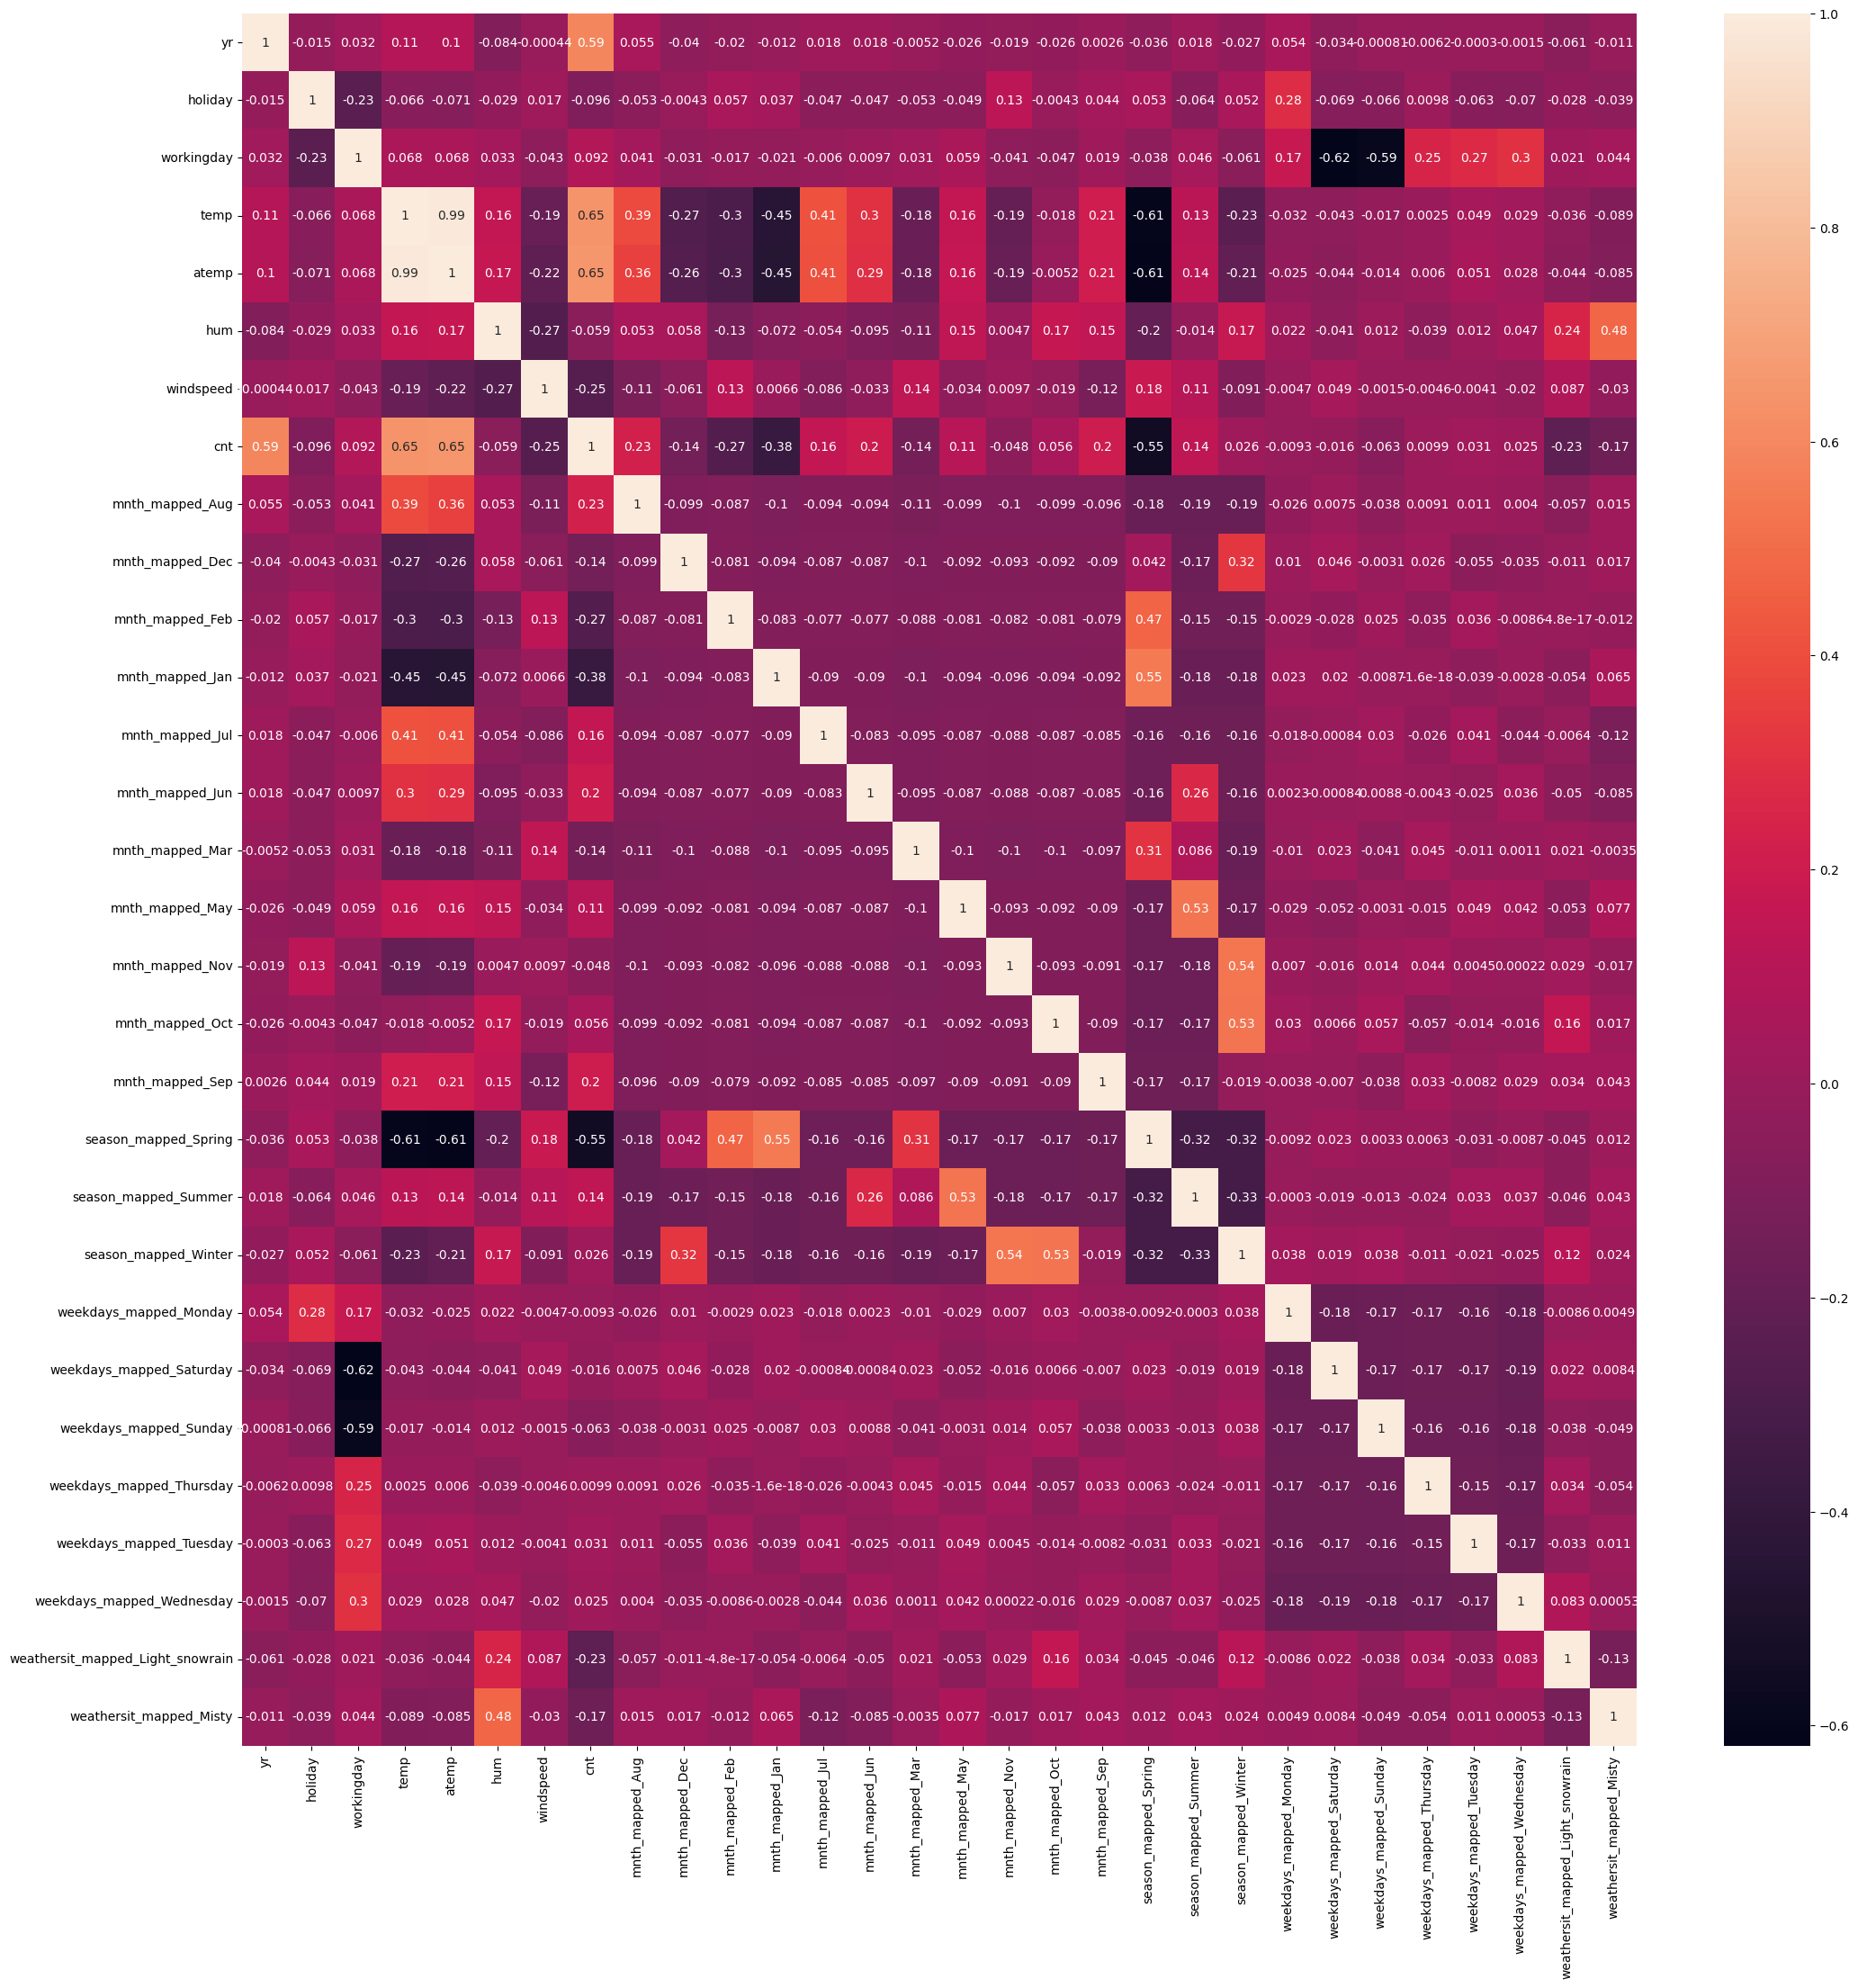

In [33]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

<Figure size 600x600 with 0 Axes>

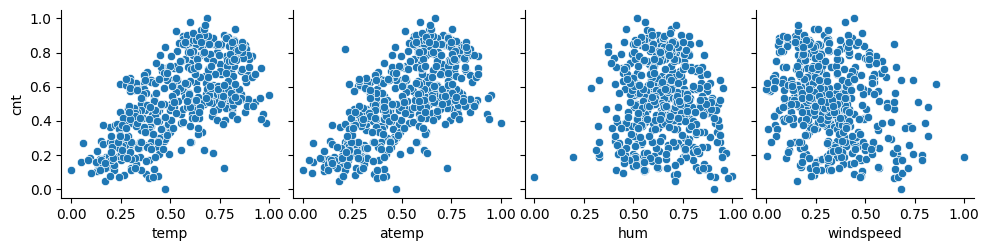

In [34]:
plt.figure(figsize=[6,6])
sns.pairplot(data=df_train,
             x_vars = ['temp','atemp','hum','windspeed'],
             y_vars = 'cnt')
plt.show()

In [35]:
# plt.figure(figsize=[6,6])
# sns.pairplot(data=df_train,
#              x_vars = ['workingday','holiday','yr'],
#              y_vars = 'cnt')
# plt.show()

# Model Building

In [36]:
x_train = df_train
y_train = df_train.pop('cnt')

In [37]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)


LinearRegression()

## Recursive feature elimination(RFE)

In [38]:
rfe = RFE(lr_model)
rfe = rfe.fit(x_train,y_train)

In [39]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_mapped_Aug', 'mnth_mapped_Dec', 'mnth_mapped_Feb',
       'mnth_mapped_Jan', 'mnth_mapped_Jul', 'mnth_mapped_Jun',
       'mnth_mapped_Mar', 'mnth_mapped_May', 'mnth_mapped_Nov',
       'mnth_mapped_Oct', 'mnth_mapped_Sep', 'season_mapped_Spring',
       'season_mapped_Summer', 'season_mapped_Winter',
       'weekdays_mapped_Monday', 'weekdays_mapped_Saturday',
       'weekdays_mapped_Sunday', 'weekdays_mapped_Thursday',
       'weekdays_mapped_Tuesday', 'weekdays_mapped_Wednesday',
       'weathersit_mapped_Light_snowrain', 'weathersit_mapped_Misty'],
      dtype='object')

In [40]:
list(zip(rfe.feature_names_in_,rfe.ranking_,rfe.support_))

[('yr', np.int64(1), np.True_),
 ('holiday', np.int64(1), np.True_),
 ('workingday', np.int64(1), np.True_),
 ('temp', np.int64(1), np.True_),
 ('atemp', np.int64(7), np.False_),
 ('hum', np.int64(1), np.True_),
 ('windspeed', np.int64(1), np.True_),
 ('mnth_mapped_Aug', np.int64(10), np.False_),
 ('mnth_mapped_Dec', np.int64(5), np.False_),
 ('mnth_mapped_Feb', np.int64(6), np.False_),
 ('mnth_mapped_Jan', np.int64(3), np.False_),
 ('mnth_mapped_Jul', np.int64(1), np.True_),
 ('mnth_mapped_Jun', np.int64(14), np.False_),
 ('mnth_mapped_Mar', np.int64(16), np.False_),
 ('mnth_mapped_May', np.int64(8), np.False_),
 ('mnth_mapped_Nov', np.int64(4), np.False_),
 ('mnth_mapped_Oct', np.int64(13), np.False_),
 ('mnth_mapped_Sep', np.int64(1), np.True_),
 ('season_mapped_Spring', np.int64(1), np.True_),
 ('season_mapped_Summer', np.int64(2), np.False_),
 ('season_mapped_Winter', np.int64(1), np.True_),
 ('weekdays_mapped_Monday', np.int64(9), np.False_),
 ('weekdays_mapped_Saturday', np.int6

In [41]:
len([i for i in rfe.support_ if i==True])

14

In [42]:
len(rfe.feature_names_in_)

29

In [43]:
# 14 feature are selected from 29 feature for prediction
selected_feature = x_train.columns[rfe.support_]

In [44]:
selected_feature

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_mapped_Jul', 'mnth_mapped_Sep', 'season_mapped_Spring',
       'season_mapped_Winter', 'weekdays_mapped_Saturday',
       'weekdays_mapped_Sunday', 'weathersit_mapped_Light_snowrain',
       'weathersit_mapped_Misty'],
      dtype='object')

In [45]:
x_train.columns[~rfe.support_]

Index(['atemp', 'mnth_mapped_Aug', 'mnth_mapped_Dec', 'mnth_mapped_Feb',
       'mnth_mapped_Jan', 'mnth_mapped_Jun', 'mnth_mapped_Mar',
       'mnth_mapped_May', 'mnth_mapped_Nov', 'mnth_mapped_Oct',
       'season_mapped_Summer', 'weekdays_mapped_Monday',
       'weekdays_mapped_Thursday', 'weekdays_mapped_Tuesday',
       'weekdays_mapped_Wednesday'],
      dtype='object')

## VIF calculation

In [46]:
def calculation_of_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF',ascending = True)
    return vif

In [47]:
x_train_selected_feature_ref = x_train[selected_feature]

In [48]:
calculation_of_vif(x_train_selected_feature_ref)

Features    VIF
0                                 yr   1.03
7                    mnth_mapped_Sep   1.11
5                          windspeed   1.18
12  weathersit_mapped_Light_snowrain   1.25
6                    mnth_mapped_Jul   1.30
13           weathersit_mapped_Misty   1.57
9               season_mapped_Winter   1.78
4                                hum   1.89
1                            holiday   2.54
8               season_mapped_Spring   2.55
3                               temp   2.99
11            weekdays_mapped_Sunday   9.64
10          weekdays_mapped_Saturday   9.92
2                         workingday  40.65

## Checking Errors in Builded LR Model using states

In [49]:
x_train_const_ols = sm.add_constant(x_train_selected_feature_ref)
lr_ols = sm.OLS(y_train, x_train_const_ols).fit()
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          9.38e-190
Time:                        19:16:50   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2435      0.025      9.653      0.000       0.194       0.293
yr                                   0.2308      0.008     28.455      0.000       0.215       0.247
holiday                             -0.0080      0.021     -0.374      0.709      -0.050       0.034
workingday                           0.0948      0.009     10.227      0.000       0.077       0.113
temp                                 0.4776      0.031     15.613      0.000       0.418       0.538
hum                                 -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed                           -0.1687      0.025     -6.616      0.000      -0.219      -0.119
mnth_mapped_Jul                     -0.0782      0.017     -4.571      0.000      -0.112      -0.045
mnth_mapped_Sep                      0.0591      0.015      3.829      0.000       0.029       0.089
season_mapped_Spring                -0.1080      0.015     -7.280      0.000      -0.137      -0.079
season_mapped_Winter                 0.0558      0.012      4.528      0.000       0.032       0.080
weekdays_mapped_Saturday             0.1046      0.011      9.177      0.000       0.082       0.127
weekdays_mapped_Sunday               0.0521      0.012      4.349      0.000       0.029       0.076
weathersit_mapped_Light_snowrain    -0.2499      0.026     -9.482      0.000      -0.302      -0.198
weathersit_mapped_Misty             -0.0578      0.011     -5.501      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                     9.62e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
x_train_ols_new = x_train_const_ols.drop(['holiday'],axis=1)
calculation_of_vif(x_train_ols_new)

Features    VIF
1                                 yr   1.03
7                    mnth_mapped_Sep   1.11
5                          windspeed   1.18
12  weathersit_mapped_Light_snowrain   1.25
6                    mnth_mapped_Jul   1.30
13           weathersit_mapped_Misty   1.57
9               season_mapped_Winter   1.78
4                                hum   1.89
8               season_mapped_Spring   2.55
3                               temp   2.99
11            weekdays_mapped_Sunday   5.74
10          weekdays_mapped_Saturday   6.06
2                         workingday   9.07
0                              const  99.60

In [51]:
x_train_const_ols_new = sm.add_constant(x_train_ols_new)
lr_ols_new = sm.OLS(y_train,x_train_const_ols_new).fit()
lr_ols_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          9.38e-190
Time:                        19:16:50   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2355      0.040      5.915      0.000       0.157       0.314
yr                                   0.2308      0.008     28.455      0.000       0.215       0.247
workingday                           0.1028      0.026      4.001      0.000       0.052       0.153
temp                                 0.4776      0.031     15.613      0.000       0.418       0.538
hum                                 -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed                           -0.1687      0.025     -6.616      0.000      -0.219      -0.119
mnth_mapped_Jul                     -0.0782      0.017     -4.571      0.000      -0.112      -0.045
mnth_mapped_Sep                      0.0591      0.015      3.829      0.000       0.029       0.089
season_mapped_Spring                -0.1080      0.015     -7.280      0.000      -0.137      -0.079
season_mapped_Winter                 0.0558      0.012      4.528      0.000       0.032       0.080
weekdays_mapped_Saturday             0.1125      0.027      4.146      0.000       0.059       0.166
weekdays_mapped_Sunday               0.0601      0.027      2.203      0.028       0.006       0.114
weathersit_mapped_Light_snowrain    -0.2499      0.026     -9.482      0.000      -0.302      -0.198
weathersit_mapped_Misty             -0.0578      0.011     -5.501      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
x_train_ols_new_1 = x_train_ols_new.drop(['weekdays_mapped_Sunday'],axis=1)
calculation_of_vif(x_train_ols_new_1)

Features    VIF
1                                 yr   1.03
7                    mnth_mapped_Sep   1.10
5                          windspeed   1.17
11  weathersit_mapped_Light_snowrain   1.25
6                    mnth_mapped_Jul   1.30
12           weathersit_mapped_Misty   1.57
10          weekdays_mapped_Saturday   1.64
2                         workingday   1.65
9               season_mapped_Winter   1.77
4                                hum   1.89
8               season_mapped_Spring   2.54
3                               temp   2.99
0                              const  66.20

In [53]:
x_train_const_ols_new_1 = sm.add_constant(x_train_ols_new_1)
lr_ols_new_1 = sm.OLS(y_train,x_train_const_ols_new_1).fit()
lr_ols_new_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          6.85e-190
Time:                        19:16:50   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     497   BIC:                            -935.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2863      0.033      8.787      0.000       0.222       0.350
yr                                   0.2311      0.008     28.376      0.000       0.215       0.247
workingday                           0.0516      0.011      4.687      0.000       0.030       0.073
temp                                 0.4774      0.031     15.545      0.000       0.417       0.538
hum                                 -0.1465      0.038     -3.877      0.000      -0.221      -0.072
windspeed                           -0.1692      0.026     -6.610      0.000      -0.219      -0.119
mnth_mapped_Jul                     -0.0771      0.017     -4.497      0.000      -0.111      -0.043
mnth_mapped_Sep                      0.0569      0.015      3.677      0.000       0.026       0.087
season_mapped_Spring                -0.1094      0.015     -7.355      0.000      -0.139      -0.080
season_mapped_Winter                 0.0546      0.012      4.414      0.000       0.030       0.079
weekdays_mapped_Saturday             0.0615      0.014      4.336      0.000       0.034       0.089
weathersit_mapped_Light_snowrain    -0.2492      0.026     -9.417      0.000      -0.301      -0.197
weathersit_mapped_Misty             -0.0575      0.011     -5.455      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       67.465   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.194
Skew:                          -0.651   Prob(JB):                     1.66e-40
Kurtosis:                       5.632   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
lr_ols_new_1.pvalues

const                                2.514430e-17
yr                                  5.071617e-106
workingday                           3.583853e-06
temp                                 1.072297e-44
hum                                  1.199248e-04
windspeed                            9.911157e-11
mnth_mapped_Jul                      8.604618e-06
mnth_mapped_Sep                      2.618751e-04
season_mapped_Spring                 7.939970e-13
season_mapped_Winter                 1.243563e-05
weekdays_mapped_Saturday             1.760314e-05
weathersit_mapped_Light_snowrain     1.739870e-19
weathersit_mapped_Misty              7.714855e-08
dtype: float64

In [55]:
lr_ols_new_1.params

const                               0.286332
yr                                  0.231078
workingday                          0.051603
temp                                0.477396
hum                                -0.146454
windspeed                          -0.169180
mnth_mapped_Jul                    -0.077140
mnth_mapped_Sep                     0.056897
season_mapped_Spring               -0.109448
season_mapped_Winter                0.054562
weekdays_mapped_Saturday            0.061495
weathersit_mapped_Light_snowrain   -0.249164
weathersit_mapped_Misty            -0.057527
dtype: float64

In [56]:
y_train_predict = lr_ols_new_1.predict(x_train_const_ols_new_1)

In [57]:
y_train_predict

576    0.729980
426    0.486170
728    0.339844
482    0.604495
111    0.270941
         ...   
578    0.850266
53     0.242527
350    0.305666
79     0.300351
520    0.644631
Length: 510, dtype: float64

/var/folders/n3/cbql2_sd28n7ws76wtd_mphw0000gn/T/ipykernel_83966/3446904440.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_predict), bins = 20)


Text(0.5, 0, 'Errors')

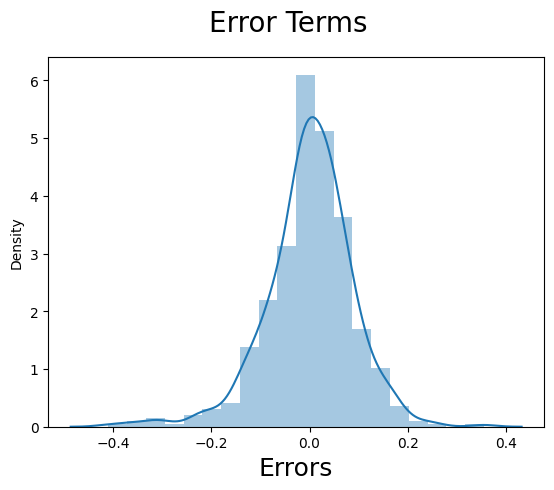

In [58]:
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [59]:
calculation_of_vif(x_train_const_ols_new_1)

Features    VIF
1                                 yr   1.03
7                    mnth_mapped_Sep   1.10
5                          windspeed   1.17
11  weathersit_mapped_Light_snowrain   1.25
6                    mnth_mapped_Jul   1.30
12           weathersit_mapped_Misty   1.57
10          weekdays_mapped_Saturday   1.64
2                         workingday   1.65
9               season_mapped_Winter   1.77
4                                hum   1.89
8               season_mapped_Spring   2.54
3                               temp   2.99
0                              const  66.20

<Axes: >

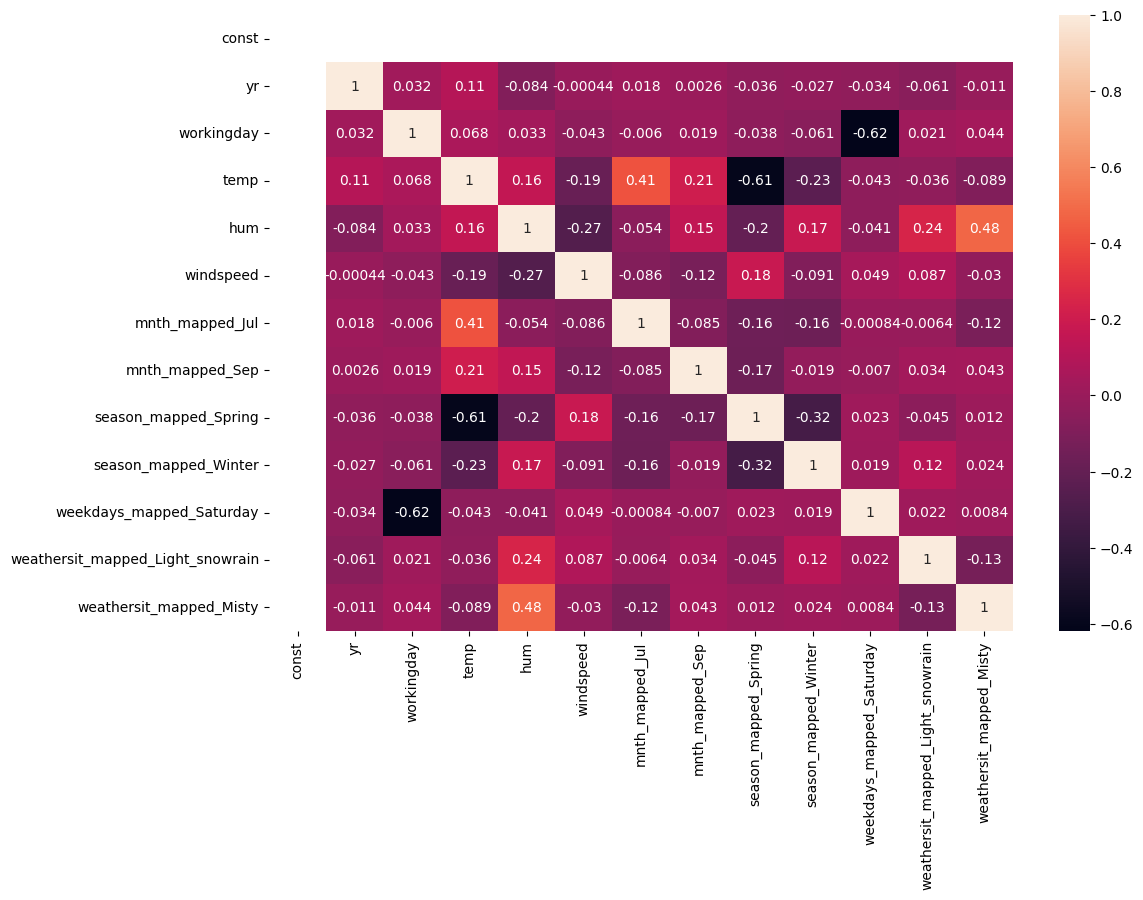

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(x_train_const_ols_new_1.corr(),annot = True)

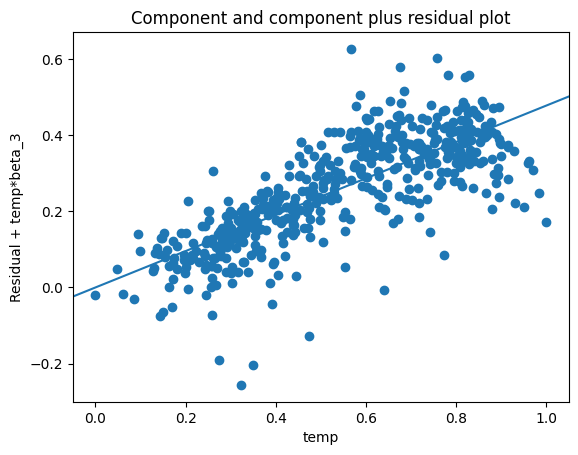

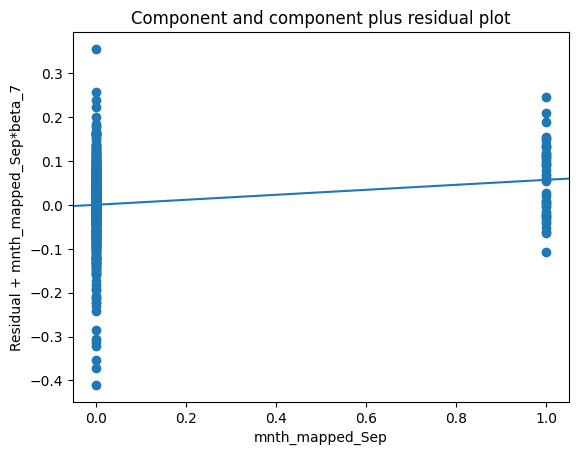

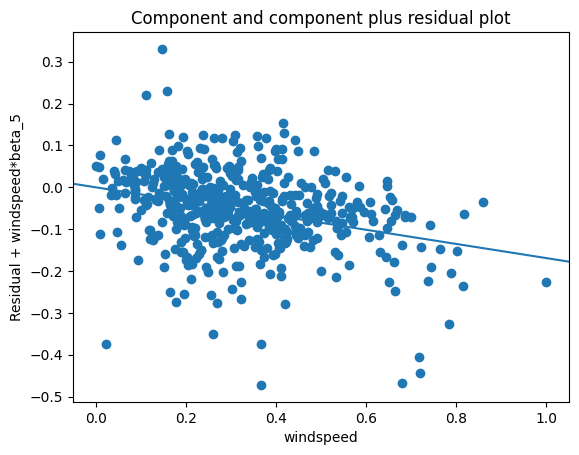

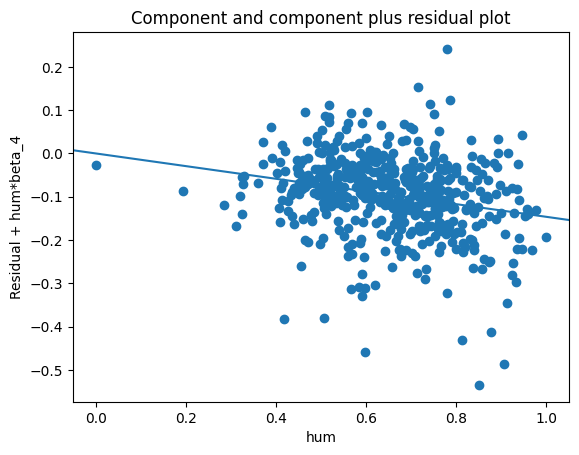

In [61]:
sm.graphics.plot_ccpr(lr_ols_new_1, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_ols_new_1, 'mnth_mapped_Sep')
plt.show()

sm.graphics.plot_ccpr(lr_ols_new_1, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_ols_new_1, 'hum')
plt.show()


### Homoscedasticity

576    0.097678
426   -0.020915
728   -0.135748
482   -0.121522
111   -0.079846
         ...   
578   -0.017431
53    -0.024511
350    0.006920
79    -0.063927
520    0.158292
Length: 510, dtype: float64


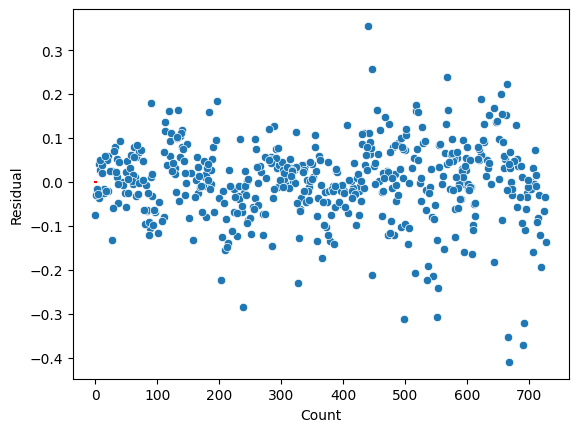

In [62]:
y_train_prediction_1 = lr_ols_new_1.predict(x_train_const_ols_new_1)
residual = y_train - y_train_prediction_1
print(residual)
sns.scatterplot(residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [63]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = mx_mn_scale.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  mnth_mapped_Aug  mnth_mapped_Dec  ...  season_mapped_Summer  \
184  0.692706                0                0  ...                     0   
535  0.712034                0                0  ...                     1   
299  0.303382                0                0  ...                     0   
221  0.547400                1                0  ...                     0   
152  0.569029                0                0  ...                     1   

     season_mapped_Winter  weekdays_mapped_Monday  weekdays_mapped_Saturday  \
184                     0                       1                         0   
535                     0                       0                         0   
299                     1                       0                         0   
221                     0                       0                         0   
152                     0                       0                         0   

     weekdays_mapped_Sunday  weekdays_mapped_Thursday  \
184                       0                         0   
535                       0                         0   
299                       0                         1   
221                       0                         0   
152                       0                         1   

     weekdays_mapped_Tuesday  weekdays_mapped_Wednesday  \
184                        0                          0   
535                        0                          1   
299                        0                          0   
221                        0                          1   
152                        0                          0   

     weathersit_mapped_Light_snowrain  weathersit_mapped_Misty  
184                                 0                        1  
535                                 0                        0  
299                                 0                        1  
221                                 0                        0  
152                                 0                        0  

[5 rows x 30 columns]

In [64]:
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
col1 = list(x_train_ols_new_1.columns)
# col1 = list(col1).remove('const')
print(col1.remove('const'))
X_test = X_test[col1]

X_test_lm_6 = sm.add_constant(X_test)
y_pred = lr_ols_new_1.predict(X_test_lm_6)
r2 = r2_score(y_test, y_pred)
round(r2,4)

None


0.8211

# Model Evalution

Text(0, 0.5, 'y_pred')

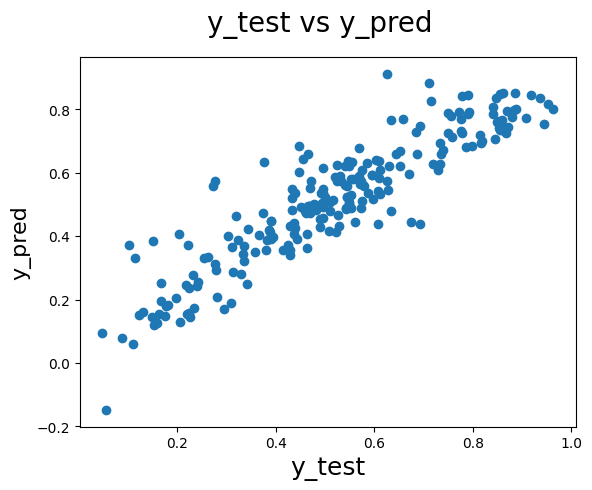

In [66]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [67]:
round(lr_ols_new_1.params,4)

const                               0.2863
yr                                  0.2311
workingday                          0.0516
temp                                0.4774
hum                                -0.1465
windspeed                          -0.1692
mnth_mapped_Jul                    -0.0771
mnth_mapped_Sep                     0.0569
season_mapped_Spring               -0.1094
season_mapped_Winter                0.0546
weekdays_mapped_Saturday            0.0615
weathersit_mapped_Light_snowrain   -0.2492
weathersit_mapped_Misty            -0.0575
dtype: float64

In [68]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8108


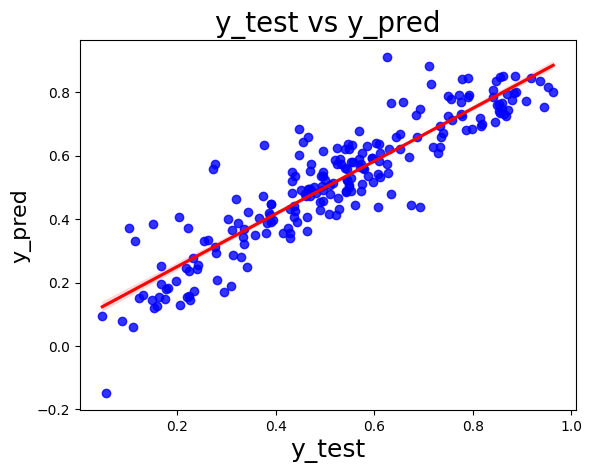

In [69]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()